Resizing images

In [25]:
import os
from PIL import Image
import numpy as np

# Define the path to your dataset
dataset_path = 'Dataset/test'  # Adjust to your dataset path within the repo

# List of emotions (folder names)
emotions = ['angry', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'suprise']

# Define the size for resizing images
image_size = (48, 48)

def load_images(input_dir):
    data = []  # List to hold the images
    labels = []  # List to hold the corresponding labels
    
    # Loop over each emotion folder
    for emotion in emotions:
        emotion_folder = os.path.join(input_dir, emotion)  # Folder for each emotion
        label = emotions.index(emotion)  # Convert emotion to a numeric label
        
        # Get all image filenames in the folder
        all_images = os.listdir(emotion_folder)
        
        # Load all images without limiting the count
        for img_name in all_images:
            img_path = os.path.join(emotion_folder, img_name)  # Path to each image
            try:
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img_array = np.array(img)  # Convert image to numpy array
                data.append(img_array)  # Add the image to the list
                labels.append(label)  # Add the label to the list
                print(f"Loaded {img_name} in {emotion} folder")
            except Exception as e:
                print(f"Error processing image {img_name}: {e}")
    
    return np.array(data), np.array(labels)

def resize_images(data, size=(48, 48)):
    resized_data = []
    errors = []  # List to track any errors
    for img_array in data:
        try:
            img = Image.fromarray(img_array)  # Convert numpy array back to image
            img = img.resize(size)  # Resize to specified dimensions
            resized_data.append(np.array(img))  # Convert resized image back to numpy array
        except Exception as e:
            errors.append(f"Error resizing image: {e}")
    
    if errors:
        print(f"Resizing completed with {len(errors)} errors.")
        for error in errors:
            print(error)
    else:
        print("All images have been resized successfully.")
    
    return np.array(resized_data)

# Load all images into lists
X, y = load_images(dataset_path)

# Resize the loaded images
X_resized = resize_images(X, image_size)

# Display the shape of the resized dataset
print(f"Resized dataset shape: {X_resized.shape}")

# Optionally, you can return or save the processed data and labels


Loaded fer0032225.png in angry folder
Loaded fer0032228.png in angry folder
Loaded fer0032239.png in angry folder
Loaded fer0032242.png in angry folder
Loaded fer0032258.png in angry folder
Loaded fer0032273.png in angry folder
Loaded fer0032274.png in angry folder
Loaded fer0032284.png in angry folder
Loaded fer0032285.png in angry folder
Loaded fer0032291.png in angry folder
Loaded fer0032330.png in angry folder
Loaded fer0032332.png in angry folder
Loaded fer0032345.png in angry folder
Loaded fer0032353.png in angry folder
Loaded fer0032359.png in angry folder
Loaded fer0032392.png in angry folder
Loaded fer0032394.png in angry folder
Loaded fer0032395.png in angry folder
Loaded fer0032403.png in angry folder
Loaded fer0032411.png in angry folder
Loaded fer0032421.png in angry folder
Loaded fer0032434.png in angry folder
Loaded fer0032462.png in angry folder
Loaded fer0032468.png in angry folder
Loaded fer0032481.png in angry folder
Loaded fer0032506.png in angry folder
Loaded fer00

Normalization


In [26]:
def normalize_images(data):
    return data / 255.0  # Normalize to [0, 1]

# Normalize the resized images
X_normalized = normalize_images(X_resized)

# Reshape if needed for CNNs
X_final = X_normalized.reshape(X_normalized.shape[0], 48, 48, 1)  # Add channel dimension (1 for grayscale)

print(f"Loaded and normalized dataset with {X_final.shape[0]} samples")


Loaded and normalized dataset with 3573 samples


Images Augmantaion

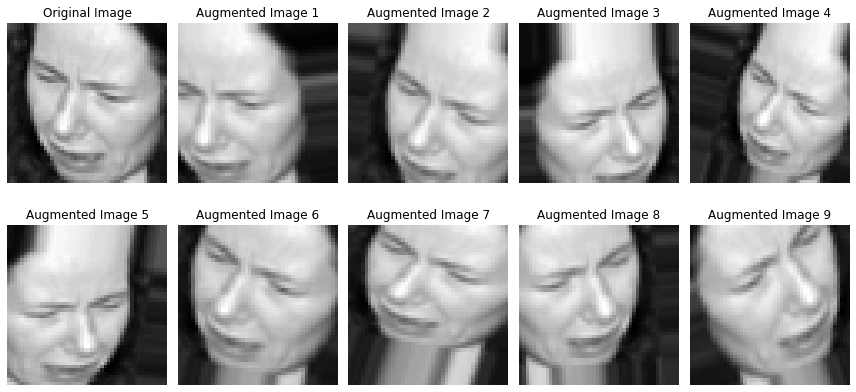

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming X_final is your original image data and has at least one sample
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Select a single image from your dataset to augment
sample_image = X_final[3000]  # Select the first image (you can choose any image)

# Reshape the image for the generator (1 sample, 48, 48, 1 for grayscale)
sample_image = sample_image.reshape((1,) + sample_image.shape)

# Create a generator for the sample image
augmented_images = datagen.flow(sample_image, batch_size=1)

# Plot the original and augmented images
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(2, 5, 1)
plt.imshow(sample_image[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display 9 augmented images
for i in range(1, 10):
    augmented_image = augmented_images.next()[0]  # Get the next augmented image
    # Convert image to uint8 format for proper display
    augmented_image = (augmented_image * 255).astype(np.uint8)  # Scale to [0, 255]
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_image, cmap='gray')
    plt.title(f'Augmented Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()
